In [1]:
import pandas as pd
import numpy as np

The results are based on two values, one in Colorado and one in Washington.

In [3]:
def get_case_wind(filename):
    # df = pd.read_csv('wa-pv-2006/DA_47.45_-121.95_2006_UPV_50MW_60_Min.csv')
    df = pd.read_csv(filename)
    total = df['Total Wind Output, MW'].sum()
    vals = df['Total Wind Output, MW'].to_numpy()
    vals = np.sort(vals) / total
    vals = np.array(vals[::-1])
    vals = np.cumsum(vals)
    return vals

filenames = ['texas_wind_output.csv']
valsplot = []
for f in filenames:
    valsplot.append(get_case_wind(f))

valsplot = np.stack(valsplot)
print(valsplot)

[[2.55747929e-04 5.11313302e-04 7.66187571e-04 ... 9.99993741e-01
  9.99997157e-01 1.00000000e+00]]


80% of the productive hours are in the 58.9% most productive hours
17.4% of the hours have less than 5% of the production


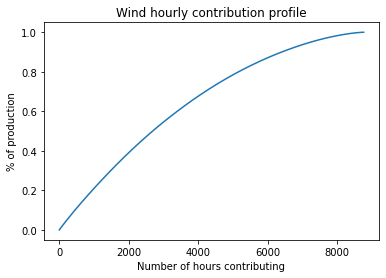

In [8]:
import matplotlib.pyplot as plt

for i in range(len(valsplot)):
    plt.title('Wind hourly contribution profile')
    plt.ylabel('% of production')
    plt.xlabel('Number of hours contributing')
    plt.plot(valsplot[i])

for i in range(len(valsplot)):
    print(f'80% of the productive hours are in the {100 * float(np.where(valsplot[i] > 0.8)[0][0]) / 8760.:.1f}% most productive hours')
    print(f'{100 * float(8760 - np.where(valsplot[i] > 0.95)[0][0]) / 8760.:.1f}% of the hours have less than 5% of the production')